In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from statsmodels.stats.weightstats import ztest as ztest
from collections import Counter
import scikit_posthocs


pd.options.mode.chained_assignment = None  # default='warn'

# DATA SCIENCE WORK PROFILE ANALISYS



# Index

#### 1. Objective of this study

#### 2. What is Data Science

#### 3. The Data Set
        
#### 4. Data Analysis
    
    4.1 What is the salary of a Data Scientist?
    
    4.2 Characterization of a Data Scientist work profile

    
        



# 1. Objective of this study

<p style='text-align:left;'> 
In this work we want to set a work perfil for the Data Scientists. First we will find out what is the salary of a data scientist working in the United States through statistical inference, and then we will characterize  the work of a data scientist, trying to understand what are the most importante skills and tools that a Data   Scientist needs to know, and what are the biggest difficulties they face on a daily basis.
</p>

# 2. What is Data Science

<p style='text-align:left;'> 
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured and unstructured data. Its main objective is extracting knowledge from typically large data sets and applying the knowledge and insights from that data to solve problems in a wide range of application domains.
</p>

# 3. The Data Set

In this study i used two data sets, the multiple choice responses and the schema.

- multipleChoiceResponses.csv: Respondents' answers to multiple choice and ranking questions. These are non-randomized and thus a single row does correspond to all of a single user's answers.


- schema.csv: a CSV file with survey schema. This schema includes the questions that correspond to each column name in the multipleChoiceResponses.csv.

In [2]:
multiple_Choice_Responses = pd.read_csv("/Users/andrelourenco/Desktop/CSV/Data_Science_Analysis_Study/multipleChoiceResponses.csv",encoding='latin-1',low_memory=False)

In [3]:
schema = pd.read_csv("/Users/andrelourenco/Desktop/CSV/Data_Science_Analysis_Study/schema.csv")

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
schema.loc[schema["Column"] == "GenderFreeForm"]

,Column,Question,Asked
1,GenderFreeForm,Select your gender identity. - A different identity - Text,All


# 4. Data Analysis

In [6]:
## colors = ['saddlebrown', 'wheat', 'crimson', 'lightgrey','lightblue','darkblue']

## 4.1 What is the salary of a Data Scientist?

We are going to focus on the US market, more specifically the people who´s salary currency is US Dollars

In [7]:
## Creating the new dataframe with US companies only
salaries = multiple_Choice_Responses.loc[multiple_Choice_Responses["CompensationCurrency"] == "USD"]
# We are going to eliminate all the NaN values, because they will affect the mean
salaries.dropna(subset=['CompensationAmount'], inplace=True)

In [8]:
# Eliminate the commas from the numbers
salaries["CompensationAmount"] = salaries["CompensationAmount"].str.replace(",","")

# We can´t convert to float because there is a row that contains a value of "-", find the index

# We reset the index
salaries = salaries.reset_index(drop=True)

# Find the index that contain the value "-"
index = list(salaries["CompensationAmount"].str.match("-").values).index(True)

# Drop that index
salaries = salaries.drop(862)

# Finnaly, we convert the columns to intenger
salaries["CompensationAmount"] = salaries["CompensationAmount"].astype(int)

In [9]:
# We can see that are pretty low values
salaries["CompensationAmount"].unique()

array([ 250000,   20000,  100000,  133000,   80000,   15000,  215000,
         83500,  115000,  135000,   75000,   10000,   85000,   65000,
        130000,   55000,   92000,   79000,  305000,   90000,  140000,
        160000,   25000,  180000,   39000,  155000,  170075,   30000,
         36000,   49000,   18000,   40000,   50000,  470000,   17200,
        150000,   60000,  178000,  107000,   67500,   58000,  105000,
        200000,  125000,   70000,   78000,   77000,   35000,  121000,
         59000,   94000,  165000,  226000,   95000,  117000,   47000,
        255000,  190000,  220000,  175000,   38000,  120000,  134000,
        320000,  110000,  103000,   71500,  210000,   72000,   67000,
         45000,   27000, 1000000,  115500,  172000,    1000,   49750,
        230000,   77250,   88500,  170000,  131000,  350000,     205,
         17000,  132000,   12000,   99999,  145000,    3000,   48000,
             0,   54000,    2000,  330000,   52500,    2400,    1100,
         52000,   10

In [10]:
# According to payscale the minimal salary for a Data Science is $50000 per year, we are going to eliminate the values
# less than that

# create a list
salaries = list(salaries["CompensationAmount"].values)

# Eliminate the salaries less than 50000
salaries = [x for x in salaries if x >= 50000]

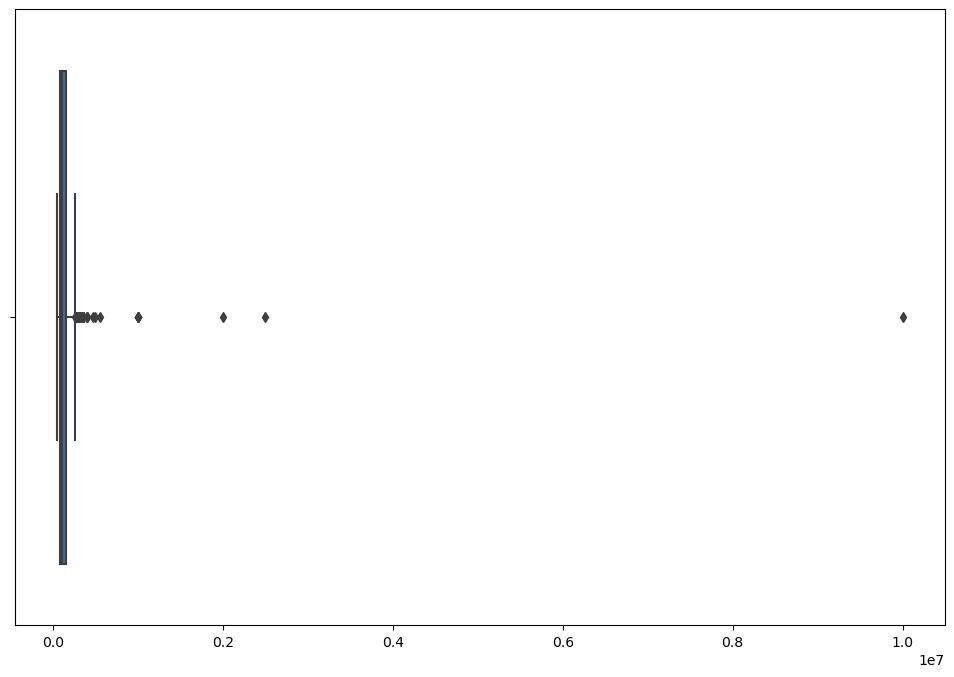

We can see that there are a lot of outliers


In [11]:
## First let´s do a boxplot of the salary in US Dollars

plt.figure(figsize = (12,8))

sns.boxplot(x = salaries)


plt.show()
print("We can see that there are a lot of outliers")

In [12]:
Q3, Q1 = np.percentile(salaries, [75 ,25])
IQR  = Q3 - Q1

Inner_Fence = Q3 + (1.5 * IQR)

In [13]:
## In this case i will erase all the outliers

salaries = [x for x in salaries if x < Inner_Fence] ## These are the outliers, let's get rid of them



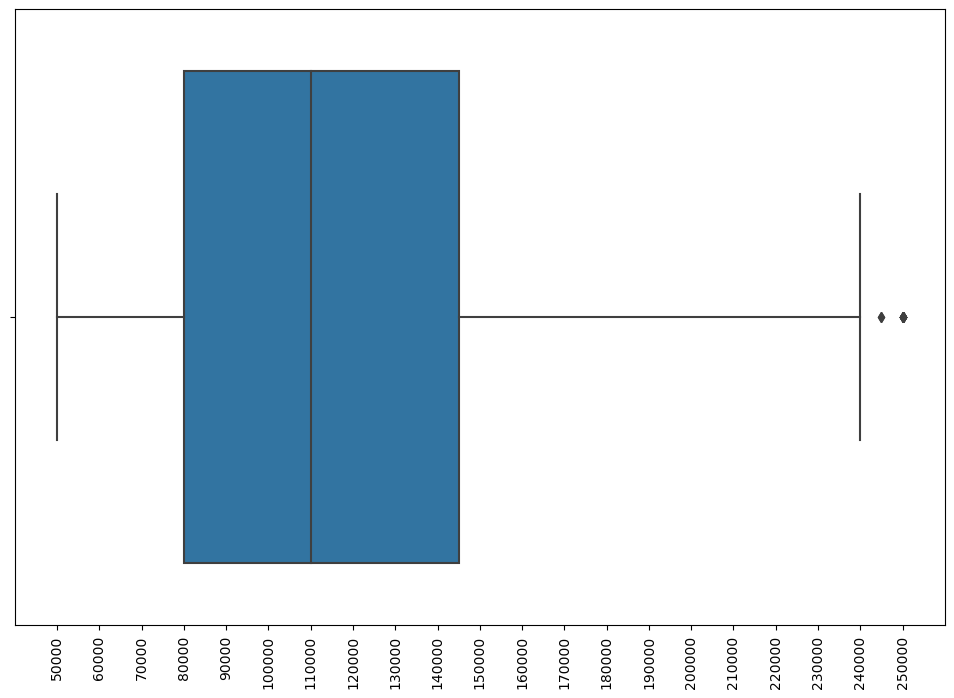

We still have outliers, that are above $240,000


In [14]:
plt.figure(figsize = (12,8))

sns.boxplot(x = salaries)
plt.xticks(np.arange(50000,260000,10000), rotation = "vertical")

plt.show()
print("We still have outliers, that are above $240,000")

In [15]:
## We are going to use Tietjen-Moore test to detect the multiple outliers

salaries = scikit_posthocs.outliers_tietjen(salaries,40)

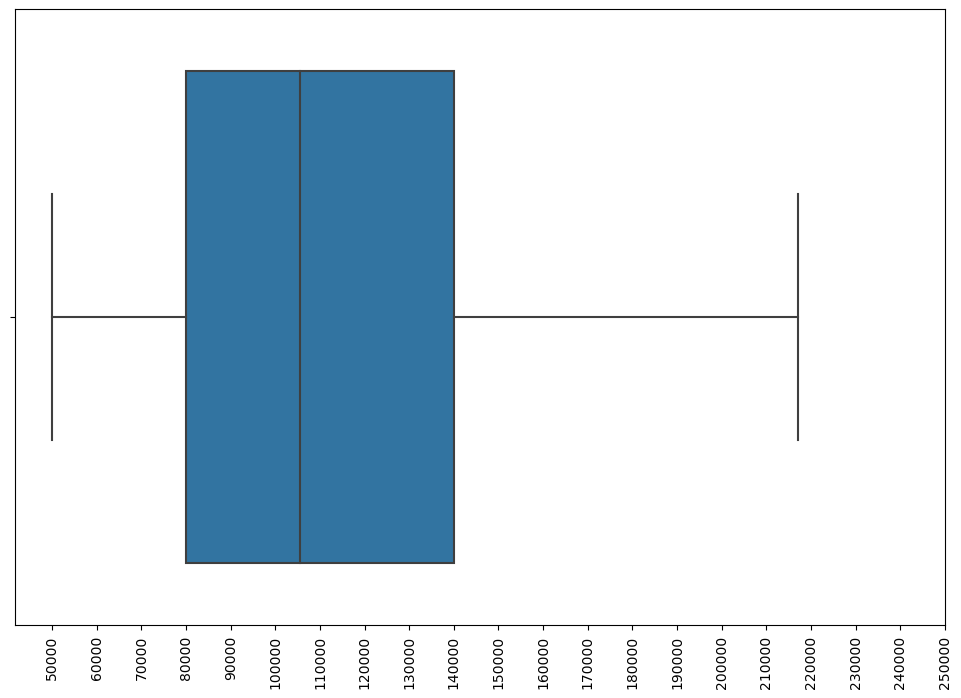

Now we can see that there are no outliers


In [16]:
plt.figure(figsize = (12,8))

sns.boxplot(x = salaries)
plt.xticks(np.arange(50000,260000,10000), rotation = "vertical")

plt.show()
print("Now we can see that there are no outliers")

In [17]:
sample_mean = sum(salaries) / len(salaries)
sample_mean = round(sample_mean)
    
print(f"According to this sample of {len(salaries)} people, the average salary of a Data Scientist is {sample_mean} US$")

According to this sample of 1166 people, the average salary of a Data Scientist is 112089 US$


##### This is just the sample mean, although it gives us a good idea of ​​the population mean, it is not enough.


##### Let´s do a 95% confidence interval based on this sample. We will use two methods:

- Confidence interval through the standart way


- Confidence interval through the bootstrapping method 

In [18]:
# The standart way, we will use a 99% level of confidence

sample_mean = sample_mean
s = np.std(salaries)
n = len(salaries)

print(stats.norm.interval(confidence=0.99,
                 loc=sample_mean,
                 scale= s/math.sqrt(n)))

print("\nWe are 99% confident that the average salary of data scientists working for US companies is approximately between \t $109,016 and $115,162")

(109016.2714468485, 115161.7285531515)

We are 99% confident that the average salary of data scientists working for US companies is approximately between 	 $109,016 and $115,162


In [19]:
# Using the bootstrapping method

data = (np.array(salaries),)

bootstrap_ci = stats.bootstrap(data, np.mean, confidence_level=0.99,
                          method='percentile')

print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=108909.30419382504, high=115273.5295626072)


We can see that the result in both ways will be very similar.

#### So we can conclude that we are 99% confident that the average salary of Data Scientists working for US companies is 

#### approximately between 109,000 usd and 115,162 usd

## According to several studies the mean of the annual salary of Data Scientists working for US companies is equal or bigger  than 115,000 usd. As the mean of our sample was around 112,089 usd, let's test this hypothesis.

u = mean of all the Data scientists working for the US companies.

Null hypotehsis, Ho: u >= $115000

Alternative Hypothesis, Ha: u < $115000 

In [20]:
alpha = 0.05
ztest_Score, p_value= ztest(np.array(salaries),value = 115000, alternative='smaller')

if(p_value <  alpha):
    print(f"The p_value:{round(p_value,5)} is smaller than the alpha_value:{alpha}")
    print(f"Reject Null Hypothesis at a {alpha} significance level")
else:
    print(f"The p_value:{round(p_value,5)} is bigger than the alpha_value:{alpha}")
    print("Fail to Reject NUll Hypothesis")


The p_value:0.00736 is smaller than the alpha_value:0.05
Reject Null Hypothesis at a 0.05 significance level


Conclusion: At the 5% significance level, there is sufficient evidence to conclude that the mean of the annual salary of Data Scientists working for US companies is lower than 115,000 usd

### Through this study we can say that: 

- We are 99% confident that the mean of the annual salary of data scientists working for US companies is approximately between 109,000 usd and 115,162 usd.


- At the 5% significance level, there is sufficient evidence to conclude that the mean of the annual salary of Data Scientists working for US companies is lower than 115,000 usd

## 4.2 Characterization of a data scientist profile

        4.2.1 Top 10 most important skills in Data Science
        
        4.2.2 Top 10 most used tools in Data Science
        
        4.2.3 Top 10 methods used in Data Science in the workplace
        
        4.2.4 Top 5 tasks where Data Scientists devote more time in the workplace
        
        4.2.5 Top 10 challenges Data Scientists encounter in the workplace
        
        4.2.6 Top 5 resource for finding data science job openings
        
        

### 4.2.1 Top 10 most important skills in Data Science

In [21]:
multiple_Choice_Responses.LearningDataScienceTime = multiple_Choice_Responses.LearningDataScienceTime.astype(str)

In [22]:
# Select the people who have at least 3 years of experience in Data Science
skills = multiple_Choice_Responses.loc[(multiple_Choice_Responses["LearningDataScienceTime"] == "5-10 years") | (multiple_Choice_Responses["LearningDataScienceTime"] == "10-15 years") | (multiple_Choice_Responses["LearningDataScienceTime"] == "15+ years") | (multiple_Choice_Responses["LearningDataScienceTime"] == "3-5 years")]   
# Select only the columns with the words "JobSkillImportance"
skills = skills.loc[:,skills.columns.str.match("JobSkillImportance")]
# Eliminate the words "JobSkillImportance", from the columns just to have the skill name
skills.columns = skills.columns.str.replace("JobSkillImportance", "")
# Replace the Na values with the words no info
skills = skills.fillna("No info")
skills.head()


,BigData,Degree,Stats,EnterpriseTools,Python,R,SQL,KaggleRanking,MOOC,Visualizations,OtherSelect1,OtherSelect2,OtherSelect3
19,Nice to have,Necessary,Necessary,Unnecessary,Nice to have,Nice to have,Nice to have,Unnecessary,Unnecessary,Nice to have,No info,No info,No info
20,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have,Nice to have
29,Necessary,Necessary,Unnecessary,Unnecessary,Nice to have,Unnecessary,Unnecessary,Unnecessary,Unnecessary,Nice to have,No info,No info,No info
35,Nice to have,Necessary,Nice to have,Necessary,Unnecessary,Unnecessary,Nice to have,Nice to have,Nice to have,Necessary,No info,No info,No info
36,Necessary,Nice to have,Nice to have,Necessary,Unnecessary,Unnecessary,Unnecessary,Unnecessary,Unnecessary,Nice to have,No info,No info,No info


In [23]:
skills["SQL"].unique()

array(['Nice to have', 'Unnecessary', 'Necessary', 'No info'],
      dtype=object)

In [24]:
def value_count(col, value):
    return col.value_counts()[value]

value_counts = skills.apply(value_count, value='Necessary')
value_counts = value_counts.nlargest(10)

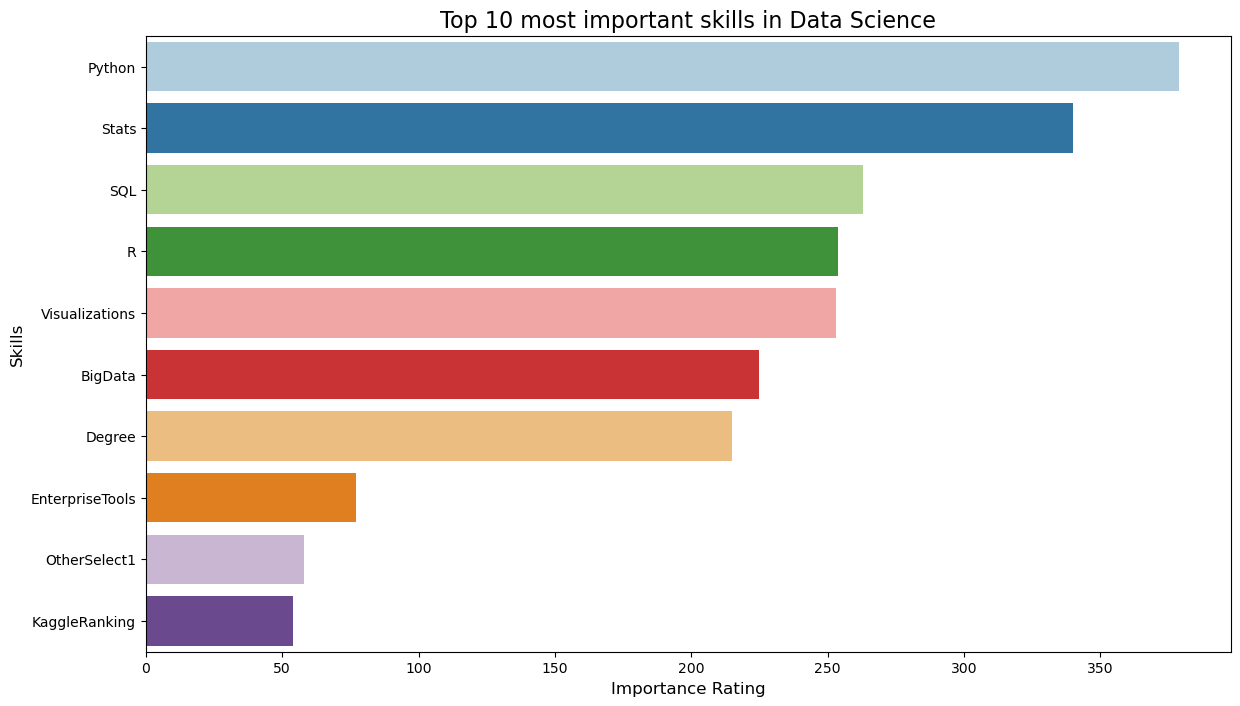

In [25]:
plt.figure(figsize=(14,8))
index = value_counts.index.values
values = value_counts.values

sns.barplot(x = values, y = index,palette = "Paired")

plt.title("Top 10 most important skills in Data Science", fontsize = 16)
plt.ylabel("Skills", fontsize = 12)
plt.xlabel("Importance Rating",fontsize = 12)

plt.show()

### 4.2.2 Top 10 most used tools in Data Science

We are going to join the columns "WorkToolsSelect" and "WorkToolsFrequency"

#### "WorkToolsSelect" Column

In [26]:
# Filling the Na values
multiple_Choice_Responses["WorkToolsSelect"].fillna("N",inplace = True) 
# Split the name of tools by a comma
multiple_Choice_Responses["WorkToolsSelect"] = multiple_Choice_Responses["WorkToolsSelect"].str.split(",")

In [27]:
multiple_Choice_Responses["WorkToolsSelect"].head()

0                                                                                                                                                                     [Amazon Web services, Oracle Data Mining/ Oracle R Enterprise, Perl]
1                                                                                                                                                                                                                                      [N]
2                                                                                                                                                                                                                                      [N]
3    [Amazon Machine Learning, Amazon Web services, Cloudera, Hadoop/Hive/Pig, Impala, Java, Mathematica, MATLAB/Octave, Microsoft Excel Data Mining, Microsoft SQL Server Data Mining, NoSQL, Python, R, SAS Base, SAS JMP, SQL, Tableau]
4                                                           

In [28]:
# We create a counter to count the number of times each item appear in the column "WorkToolsSelect"
c = Counter([item for sublist in multiple_Choice_Responses["WorkToolsSelect"] for item in sublist])
# Top 20 most common values
most_common = c.most_common(20)
# Elimante the first value, because it is the Non value item
del most_common[0]
most_common

[('Python', 6073),
 ('R', 4708),
 ('SQL', 4261),
 ('Jupyter notebooks', 3206),
 ('TensorFlow', 2256),
 ('Amazon Web services', 1868),
 ('Unix shell / awk', 1854),
 ('Tableau', 1619),
 ('C/C++', 1528),
 ('NoSQL', 1527),
 ('MATLAB/Octave', 1461),
 ('Java', 1453),
 ('Hadoop/Hive/Pig', 1378),
 ('Spark / MLlib', 1359),
 ('Microsoft Excel Data Mining', 1087),
 ('Other', 917),
 ('SAS Base', 738),
 ('Microsoft Azure Machine Learning', 589),
 ('Google Cloud Compute', 539)]

#### "WorkToolsFrequency" Column

In [29]:
# Select only the columns with the words "WorkToolsFrequency"
tools = multiple_Choice_Responses.loc[:,multiple_Choice_Responses.columns.str.match("WorkToolsFrequency")]
# Eliminate the words "JobSkillImportance", from the columns just to have the tool´s name
tools.columns = tools.columns.str.replace("WorkToolsFrequency", "")
tools.head()

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
0,NaN,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rarely,Often,NaN,NaN,Rarely,NaN,NaN,NaN,Rarely,NaN,...,NaN,Often,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Sometimes,NaN,NaN,NaN,NaN


In [30]:
tools.AmazonML.unique()

array([nan, 'Rarely', 'Sometimes', 'Often', 'Most of the time'],
      dtype=object)

The rating categories are:

- Rarely


- Sometimes


- Often


- Most of the time

Now i am going to join this information with the previous one:

    I will give "Most of the time" a classification of 1 point, often 0.5 points, Sometimes 0.2 and Rarely 0.

In [31]:
tools.replace("Most of the time",1, inplace = True)
tools.replace("Often",0.5, inplace = True)
tools.replace("Sometimes",0.2, inplace = True)
tools.replace("Rarely",0, inplace = True)

In [32]:
## Let´s see the top 20 tools
series1 = tools.sum(axis=0).nlargest(20)
series1

Python          4181.0
SQL             2821.4
R               2729.8
Jupyter         1901.5
Unix            1173.9
TensorFlow       927.0
AWS              861.2
Tableau          661.5
NoSQL            621.5
Java             601.6
Spark            594.9
Hadoop           571.5
C                557.8
Excel            543.8
MATLAB           526.1
Select1          445.5
SASBase          372.2
GCP              200.0
Cloudera         197.3
MicrosoftSQL     195.7
dtype: float64

In [33]:
# Transform the list into a dictionary
most_common = dict(most_common)
# Transform the dictionary into a pandas Series
most_common = pd.Series(most_common)
most_common

Python                              6073
R                                   4708
SQL                                 4261
Jupyter notebooks                   3206
TensorFlow                          2256
Amazon Web services                 1868
Unix shell / awk                    1854
Tableau                             1619
C/C++                               1528
NoSQL                               1527
MATLAB/Octave                       1461
Java                                1453
Hadoop/Hive/Pig                     1378
Spark / MLlib                       1359
Microsoft Excel Data Mining         1087
Other                                917
SAS Base                             738
Microsoft Azure Machine Learning     589
Google Cloud Compute                 539
dtype: int64

In [34]:
# We will some the two series
tool_series = series1.add(most_common,fill_value=0)
# get the 10 largest values
tool_series = tool_series.nlargest(10)

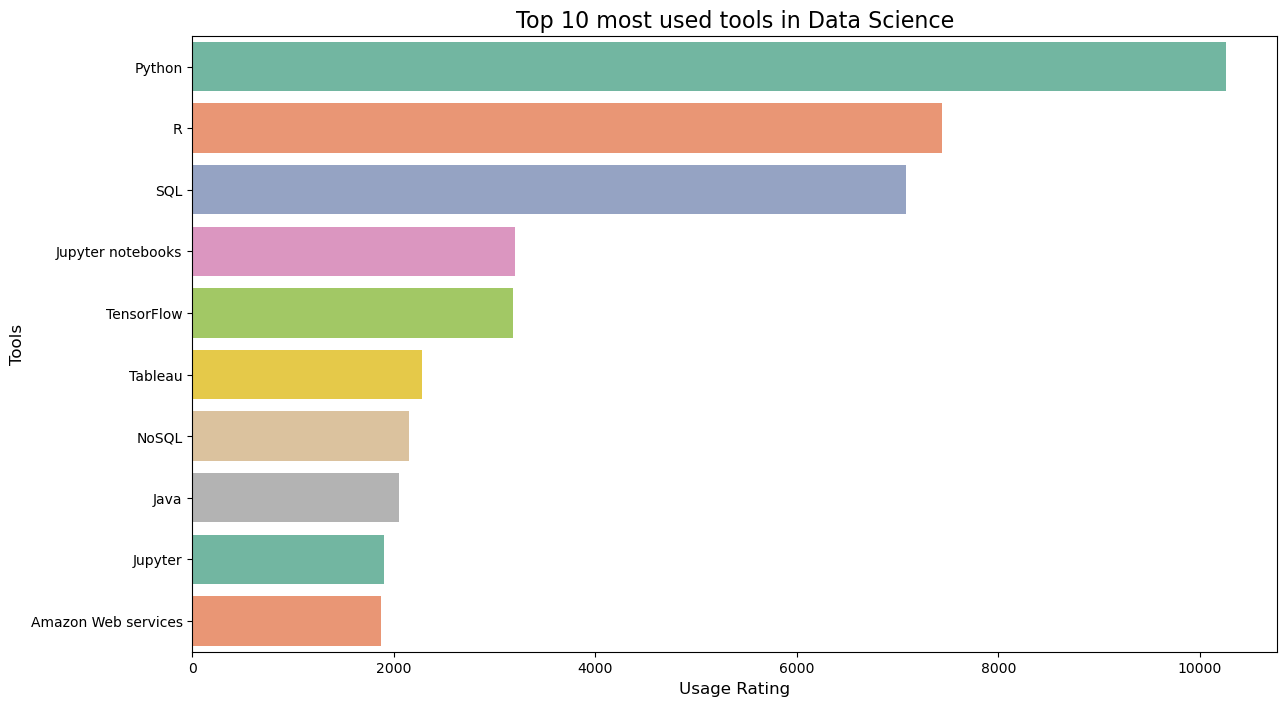

In [35]:
plt.figure(figsize=(14,8))
index = tool_series.index.values
values = tool_series.values

sns.barplot(x = values, y = index, palette = "Set2")

plt.title("Top 10 most used tools in Data Science", fontsize = 16)
plt.ylabel("Tools", fontsize = 12)
plt.xlabel("Usage Rating",fontsize = 12)

plt.show()

### 4.2.3 Top 10 methods used in Data Science in the workplace

In [36]:
# Select only the columns with the words "WorkMethodsFrequency"
methods = multiple_Choice_Responses.loc[:,multiple_Choice_Responses.columns.str.match("WorkMethodsFrequency")]
# Eliminate the words "WorkMethodsFrequency", from the columns just to have the methods name
methods.columns = methods.columns.str.replace("WorkMethodsFrequency", "")
# Replace the Na values with the words no info
methods = methods.fillna("No info")
methods.head()

,A/B,AssociationRules,Bayesian,CNNs,CollaborativeFiltering,Cross-Validation,DataVisualization,DecisionTrees,EnsembleMethods,EvolutionaryApproaches,...,RecommenderSystems,RNNs,Segmentation,Simulation,SVMs,TextAnalysis,TimeSeriesAnalysis,Select1,Select2,Select3
0,No info,Rarely,No info,No info,Often,No info,No info,No info,No info,No info,...,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info
1,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,...,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info
2,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info,...,No info,No info,No info,No info,No info,No info,No info,No info,No info,No info
3,Sometimes,No info,Sometimes,No info,No info,No info,Sometimes,Often,Sometimes,No info,...,No info,No info,No info,Often,No info,No info,Often,No info,No info,No info
4,No info,Sometimes,Often,Most of the time,Sometimes,No info,Most of the time,Sometimes,Often,Sometimes,...,No info,Sometimes,Often,No info,Most of the time,No info,Sometimes,No info,No info,No info


In [37]:
methods["A/B"].unique()

array(['No info', 'Sometimes', 'Often', 'Rarely', 'Most of the time'],
      dtype=object)

The rating categories are:

- Rarely


- Sometimes


- Often


- Most of the time

Now i am going to join this information with the previous one:

    I will give "Most of the time" a classification of 1 point, often 0.5 points, Sometimes 0.2 and Rarely 0.

In [38]:
methods.replace("Most of the time",1, inplace = True)
methods.replace("Often",0.5, inplace = True)
methods.replace("Sometimes",0.2, inplace = True)
methods.replace("Rarely",0, inplace = True)
methods.replace("No info",0, inplace = True)

In [39]:
methods.sum().nlargest(10)

DataVisualization     3759.5
Cross-Validation      2437.7
LogisticRegression    2135.1
DecisionTrees         1706.7
RandomForests         1638.7
TimeSeriesAnalysis    1623.5
NeuralNetworks        1420.0
PCA                   1270.5
TextAnalysis          1192.1
KNN                   1065.7
dtype: float64

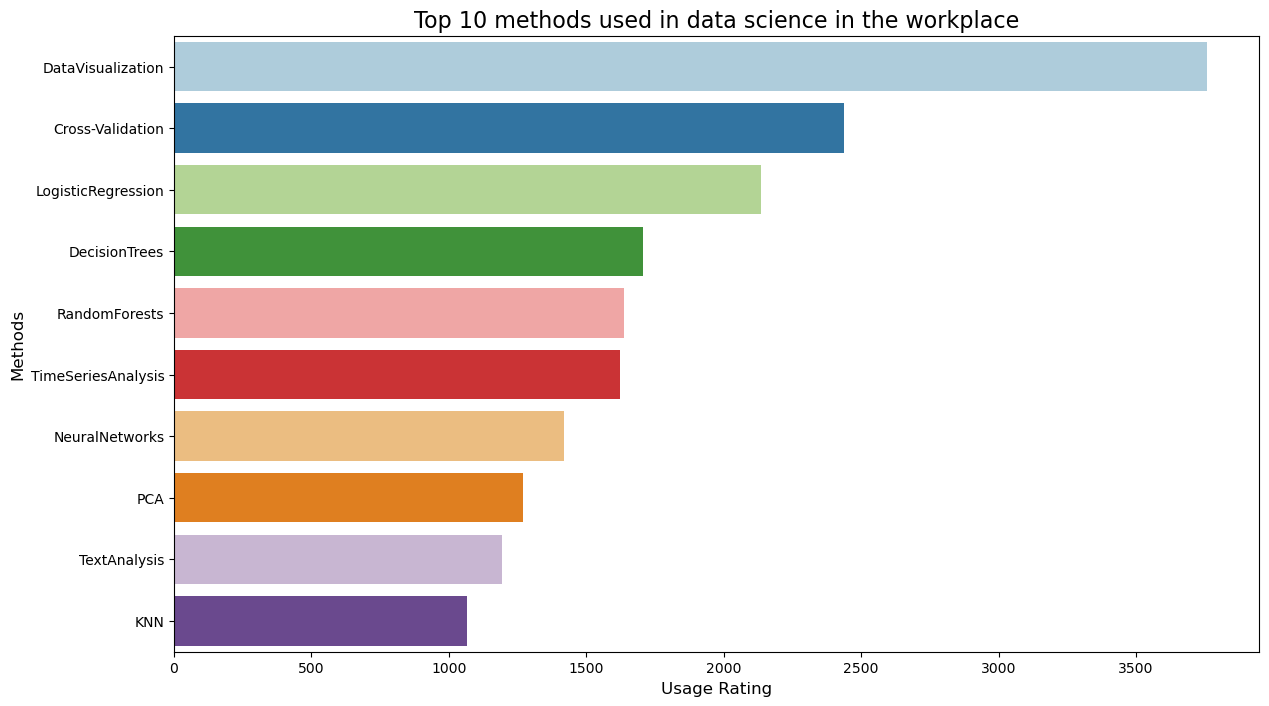

In [40]:
plt.figure(figsize=(14,8))
index = methods.sum().nlargest(10).index.values
values = methods.sum().nlargest(10).values

sns.barplot(x = values, y = index,palette = "Paired")

plt.title("Top 10 methods used in data science in the workplace", fontsize = 16)
plt.ylabel("Methods", fontsize = 12)
plt.xlabel("Usage Rating",fontsize = 12)

plt.show()

### 4.2.4 Top 10 tasks where Data Scientists devote more time in the workplace

In [41]:
# Select only the columns with the words "Time"
tasks = multiple_Choice_Responses.loc[:,multiple_Choice_Responses.columns.str.match("Time")]
# Eliminate the words "Time", from the columns just to have the methods name
tasks.columns = tasks.columns.str.replace("Time", "")
# Replace the Na values with the words no info
tasks = tasks.fillna(0)
tasks.head()

,SpentStudying,GatheringData,ModelBuilding,Production,Visualizing,FindingInsights,OtherSelect
0,0,0.0,100.0,0.0,0.0,0.0,0.0
1,2 - 10 hours,0.0,0.0,0.0,0.0,0.0,0.0
2,2 - 10 hours,0.0,0.0,0.0,0.0,0.0,0.0
3,0,50.0,20.0,0.0,10.0,20.0,0.0
4,0,30.0,20.0,15.0,15.0,20.0,0.0


In [42]:
### Eliminate the "SpentStudying" column because we only want the tasks that are done in the workplace
tasks.drop("SpentStudying", axis = 1,inplace = True)
tasks.head()

,GatheringData,ModelBuilding,Production,Visualizing,FindingInsights,OtherSelect
0,0.0,100.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,20.0,0.0,10.0,20.0,0.0
4,30.0,20.0,15.0,15.0,20.0,0.0


In [43]:
tasks.sum().nlargest(5).values

array([272170. , 160106. , 104422.5,  98512. ,  81231.5])

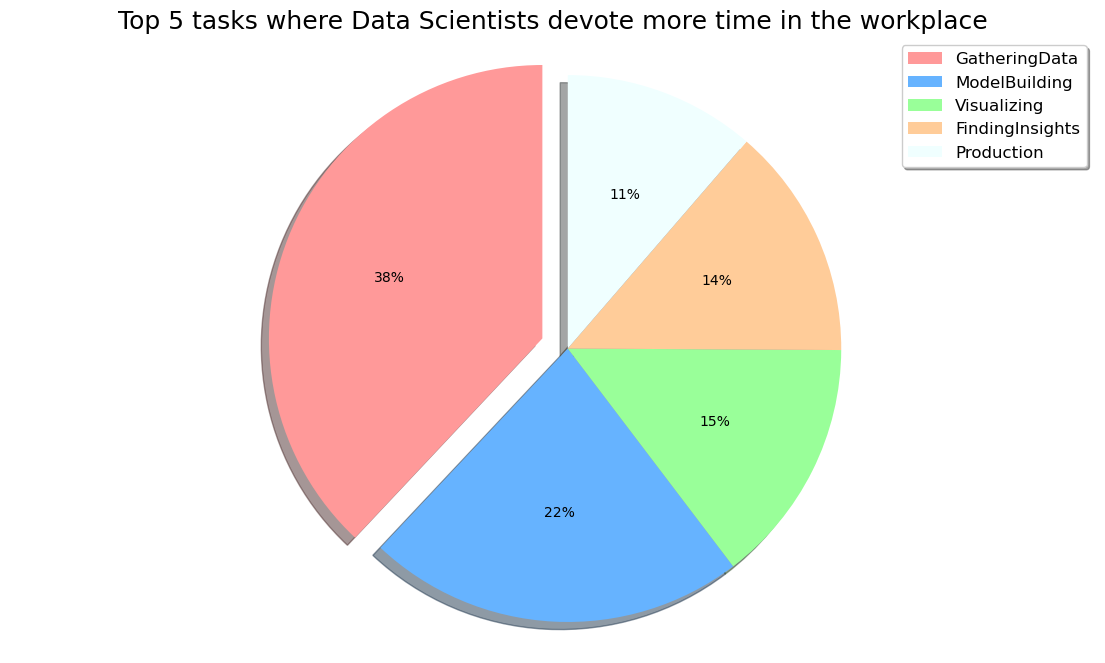

In [44]:
plt.figure(figsize=(14,8))

# only "explode" the 1nd slice
explode = (0.1, 0, 0, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"azure"]
plt.pie(tasks.sum().nlargest(5).values,autopct='%1.0f%%',colors = colors, explode = explode,
       shadow=True, startangle=90)

plt.title("Top 5 tasks where Data Scientists devote more time in the workplace",fontsize = 18)
plt.legend(labels = tasks.sum().nlargest(5).index.values,bbox_to_anchor=(1.0, 1.0),shadow=True,fontsize='large')
plt.axis('equal')
plt.show()

### 4.2.5 Top 10 challenges Data Scientists encounter in the workplace

In [45]:
# Select only the columns with the words "WorkChallengeFrequency"
challenges = multiple_Choice_Responses.loc[:,multiple_Choice_Responses.columns.str.match("WorkChallengeFrequency")]
# Eliminate the words "WorkChallengeFrequency", from the columns just to have the methods name
challenges.columns = challenges.columns.str.replace("WorkChallengeFrequency", "")
# Replace the Na values with the words no info
challenges = challenges.fillna(0)
challenges.head()

,Politics,UnusedResults,UnusefulInstrumenting,Deployment,DirtyData,Explaining,Pass,Integration,Talent,DataFunds,...,Tools,Expectations,ITCoordination,HiringFunds,Privacy,Scaling,Environments,Clarity,DataAccess,OtherSelect
0,Rarely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Often,Most of the time,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Often,Often,Often,Often,Often,Often,0,Often,Often,Often,...,Often,Often,0,Often,Often,Often,Often,Often,Often,0
4,Often,Sometimes,0,0,0,0,0,0,Sometimes,Sometimes,...,0,0,Sometimes,0,Most of the time,0,Sometimes,0,0,0


In [46]:
challenges.Politics.unique()

array(['Rarely', 0, 'Often', 'Most of the time', 'Sometimes'],
      dtype=object)

The rating categories are:

- Rarely


- Sometimes


- Often


- Most of the time

Now i am going to join this information with the previous one:

    I will give "Most of the time" a classification of 1 point, often 0.5 points, Sometimes 0.2 and Rarely 0.

In [47]:
challenges.replace("Most of the time",1, inplace = True)
challenges.replace("Often",0.5, inplace = True)
challenges.replace("Sometimes",0.2, inplace = True)
challenges.replace("Rarely",0, inplace = True)

In [48]:
challenges.sum().nlargest(10)

DirtyData          2347.7
Talent             1679.4
Politics           1398.1
Clarity            1205.1
DataAccess         1200.3
UnusedResults       783.7
HiringFunds         770.8
Explaining          744.5
DomainExpertise     715.5
Privacy             709.7
dtype: float64

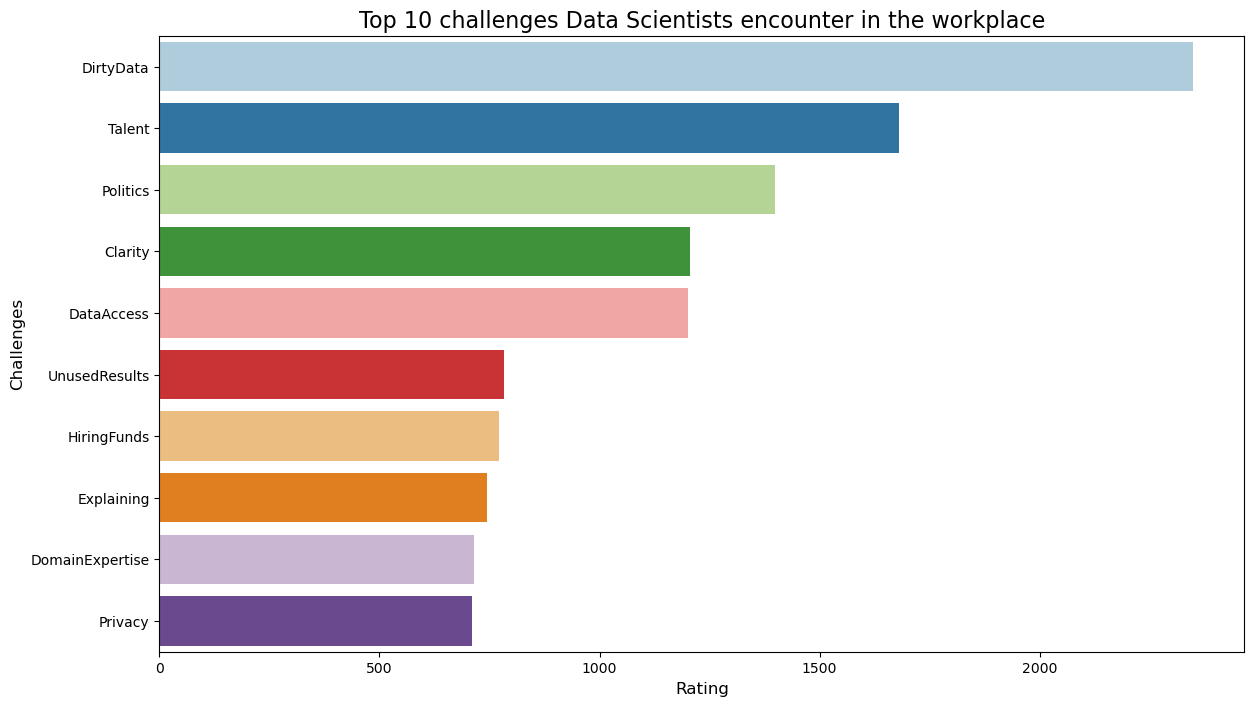

In [49]:
plt.figure(figsize=(14,8))
index = challenges.sum().nlargest(10).index.values
values = challenges.sum().nlargest(10).values

sns.barplot(x = values, y = index,palette = "Paired")

plt.title("Top 10 challenges Data Scientists encounter in the workplace", fontsize = 16)
plt.ylabel("Challenges", fontsize = 12)
plt.xlabel("Rating",fontsize = 12)

plt.show()

### 4.2.6 Top 5 resource for finding data science job openings

In [50]:
multiple_Choice_Responses = pd.read_csv("/Users/andrelourenco/Desktop/CSV/Data_Science_Analysis_Study/multipleChoiceResponses.csv",encoding='latin-1',low_memory=False)

In [51]:
# Replace the Na values for "No info"
multiple_Choice_Responses.JobSearchResource = multiple_Choice_Responses.JobSearchResource.fillna("No info")
# All the column in string values
multiple_Choice_Responses.JobSearchResource = multiple_Choice_Responses.JobSearchResource.astype(str)

In [52]:
# Split by the values "and", "or", "," , "/"
multiple_Choice_Responses["JobSearchResource"] = multiple_Choice_Responses["JobSearchResource"].str.split("," or "/" or "or" or "and")

In [53]:
# We create a counter to count the number of times each item appear in the column "WorkToolsSelect"
c = Counter([item for sublist in multiple_Choice_Responses["JobSearchResource"] for item in sublist])
# Top 5 most common values
most_common = c.most_common(6)
# Elimante the first value, because it is the Non value item
del most_common[0]
most_common

[("Company's Web site/job listing page", 911),
 ('Tech-specific job board', 732),
 ('Searching general-purpose job board', 684),
 ('Asking friends', 445),
 (' family members', 445)]

In [54]:
# Transform the list into a dictionary
most_common = dict(most_common)
# Transform the dictionary into a pandas Series
most_common = pd.Series(most_common)
most_common

Company's Web site/job listing page    911
Tech-specific job board                732
Searching general-purpose job board    684
Asking friends                         445
 family members                        445
dtype: int64

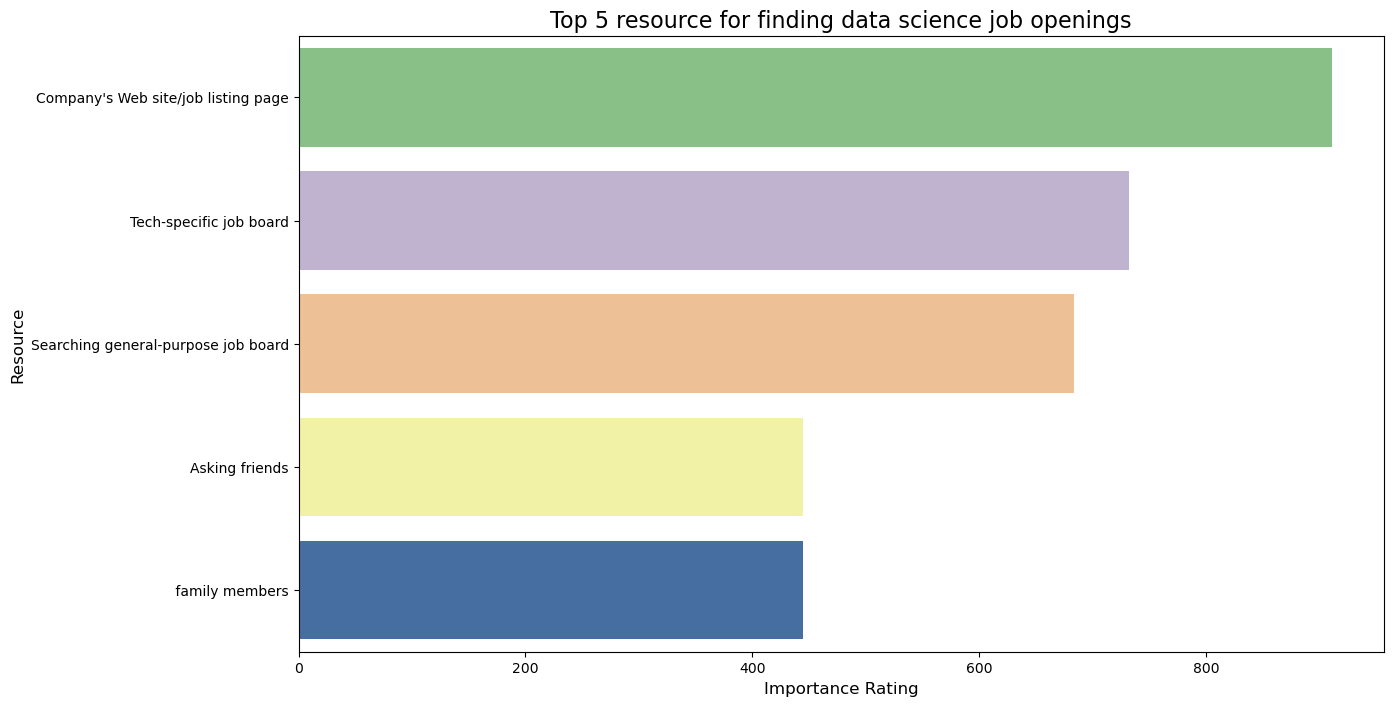

In [55]:
plt.figure(figsize=(14,8))
index = most_common.index.values
values = most_common.values

sns.barplot(x = values, y = index,palette = "Accent")

plt.title("Top 5 resource for finding data science job openings", fontsize = 16)
plt.ylabel("Resource", fontsize = 12)
plt.xlabel("Importance Rating",fontsize = 12)

plt.show()

### Conclusion:

Through this study we found that the main skills a data scientist should have are programming skills, with python language being the one that stands out the most. Must have a good knowledge of statistics. On the other hand, he must be able to manipulate data in databases and that is why the SQL also stands out a lot. Finally, data visualization appears as the main method to be used in the workplace and therefore tools such as power bi or tableau are also very important.